# Import Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt 

# Setting up the pre-trained model (mobilenet_v3)

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
classLabels = []

with open('Labels.txt', 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5) # 255/2 = 127.5
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

<dnn_Model 0000021F03E80130>

# Reading an Image

In [8]:
img = cv2.imread('testing_images\image5.jpg')

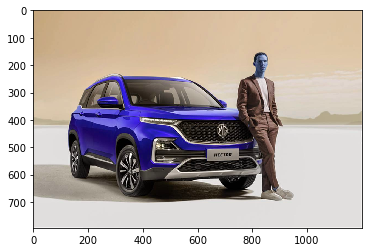

In [9]:
plt.imshow(img) # bgr

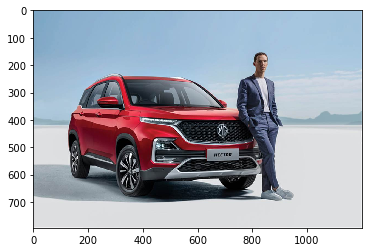

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [12]:
print(ClassIndex)

[[3]
 [1]]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    print(ClassInd, conf)
    cv2.rectangle(img, boxes,(255,0,0),3)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10, boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=3)

3 0.787558
1 0.785762


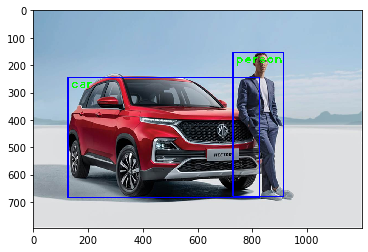

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Run Video 

In [17]:
cap = cv2.VideoCapture('testing_videos/video1.mp4')

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot capture Video")
    
font_scale=3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes, (255,0,0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+40) , font, fontScale=font_scale, color=(0,255,0), thickness=2)
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

()
()
()
()
()
()
()
[[1]
 [3]]
[[1]
 [3]]
[[1]
 [3]]
[[1]
 [3]]
[[1]
 [3]]
[[1]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [1]
 [3]]
[[ 1]
 [ 3]
 [10]]
[[ 3]
 [ 1]
 [10]
 [ 1]
 [ 1]]
[[ 3]
 [ 1]
 [10]
 [ 1]
 [ 1]]
[[ 1]
 [ 3]
 [ 1]
 [10]
 [ 1]
 [10]]
[[ 1]
 [ 3]
 [10]
 [10]
 [ 1]
 [ 1]]
[[ 3]
 [ 1]
 [10]
 [ 1]
 [10]]
[[ 3]
 [ 1]
 [ 1]
 [10]]
[[ 3]
 [ 1]
 [ 1]
 [10]]
[[ 3]
 [ 1]
 [10]
 [ 1]]
[[3]
 [1]
 [1]]
[[3]
 [1]
 [1]]
[[ 3]
 [ 1]
 [ 1]
 [10]]
[[ 3]
 [ 1]
 [ 1]
 [10]
 [10]
 [ 3]]
[[ 3]
 [ 1]
 [ 1]
 [10]
 [10]
 [ 3]]
[[ 3]
 [ 1]
 [ 1]
 [10]
 [10]
 [ 3]]
[[ 1]
 [ 3]
 [ 1]
 [10]
 [ 1]
 [10]
 [ 3]
 [ 2]]
[[ 1]
 [ 3]
 [ 1]
 [10]
 [ 2]
 [ 3]
 [ 1]
 [10]]
[[ 1]
 [ 3]
 [ 1]
 [ 2]
 [10]
 [ 3]
 [ 1]
 [ 1]]
[[ 3]
 [ 1]
 [ 1]
 [ 2]
 [10]
 [ 3]]
[[3]
 [1]
 [1]
 [2]
 [3]]
[[3]
 [1]
 [1]
 [2]
 [3]]
[[3]
 [1]
 [1]
 [2]
 [3]]
[[3]
 [1]
 [1]
 [2]
 [3]
 [2]
 [1]]
[[3]
 [1]
 [1]
 [3]
 [2]]
[[3]
 [1]
 [1]
 [3]
 [2]]
[[3]
 [1]
 [1]
 [3]
 [1]]
[[3]
 [1]
 [1]
 [3]
 [2]]
[[3]
 [1]
 [1]
 [3]]
[[3]
 [1]
 [1]
 [3]]
[[3]
 [1]

[[ 3]
 [10]
 [ 1]
 [ 1]
 [ 1]]
[[ 3]
 [10]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [10]
 [ 3]
 [ 1]
 [ 1]
 [ 3]]
[[10]
 [ 3]
 [ 1]
 [ 1]
 [ 3]]
[[ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]]
[[10]
 [ 1]
 [ 1]]
[[ 1]
 [10]]
[[ 1]
 [10]]
[[ 1]
 [10]]
[[ 1]
 [10]]
[[ 1]
 [10]]
[[ 1]
 [10]
 [ 3]]
[[ 1]
 [10]
 [ 3]
 [ 3]]
[[ 1]
 [10]
 [ 3]
 [ 3]]
[[1]
 [3]
 [3]]
[[ 1]
 [ 3]
 [10]
 [ 2]]
[[1]
 [3]
 [2]
 [3]]
[[1]
 [1]
 [3]]
[[1]
 [3]
 [1]
 [1]
 [3]]
[[3]
 [2]
 [3]
 [1]
 [1]]
[[3]
 [3]
 [3]
 [2]]
[[3]
 [2]
 [1]]
[[3]
 [3]
 [1]]
[[3]
 [3]]
[[3]
 [3]]
[[3]
 [3]
 [1]]
[[3]
 [3]
 [1]]
[[3]
 [3]
 [3]]
[[ 3]
 [10]
 [ 1]
 [ 1]]
[[10]
 [ 1]]
[[ 3]
 [ 1]
 [10]]
[[ 1]
 [10]]
[[3]
 [3]]
[[3]]
[[3]
 [3]
 [1]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [3]
 [1]]
[[3]
 [3]]
[[3]
 [1]]
[[3]
 [3]
 [1]]
[[3]
 [3]
 [1]
 [3]
 [1]
 [1]]
[[3]
 [3]
 [3]
 [1]
 [1]]
[[3]
 [3]
 [3]
 [1]]
[[3]
 [3]
 [3]
 [1]]
[[3]
 [3]
 [3]
 [1]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]

KeyboardInterrupt: 

# Run on Video Cam

In [15]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot capture Video")
    
font_scale=3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes, (255,0,0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+40) , font, fontScale=font_scale, color=(0,255,0), thickness=2)
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

()
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]
 [79]]
[[82]
 [ 1]
 [79]]
[[82]
 [ 1]
 [79]]
[[82]
 [ 1]
 [79]]
[[82]
 [ 1]
 [79]]
[[82]
 [ 1]
 [79]]
[[82]
 [79]
 [ 1]]
[[82]
 [79]
 [ 1]]
[[82]
 [79]
 [ 1]]
[[82]
 [79]
 [ 1]]
[[82]
 [79]
 [ 1]]
[[82]
 [79]
 [ 1]]
[[82]
 [79]
 [ 1]]
[[82]
 [79]
 [ 1]]
[[82]
 [79]
 [ 1]]
[[82]
 [79]
 [ 1]]
[[82]
 [79]
 [ 1]]
[[82]
 [ 1]
 [79]]
[[82]
 [ 1]
 [79]]
[[82]
 [ 1]]
[[82]
 [ 1]
 [79]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]]
[[82]]
[[82]
 [ 1]]
[[82]
 [ 1]]
[[82]]
()
[[82]]
[[1]]
[[1]]
()
[[ 1]
 [32]]
[[1]]
[[1]]
()
()
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [70]]
[[ 1]
 [70]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[87]
 [ 1]]
[[ 1]
 [87]
 [90]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [90]]
[[87]
 [ 1]
 [90]]
[[87]
 [90]
 [ 1]
 [90]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [90]]
[[ 1]
 [90]]
[[ 1]
 [90]
 [90]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[1]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [90]]
[[ 1]
 [90]
 [87]]
[[1]]
[[ 1]
 [90]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[1]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[1]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[87]
 [ 1]]
[[87]
 [ 1]]
[[ 1]
 [87]]
[[87]
 [ 1]]
[[87]
 [ 1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[87]
 [ 1]]
[[87]
 [ 

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[ 1]
 [87]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [39]]
[[ 1]
 [39]]
[[ 1]
 [87]]
[[87]
 [ 1]]
[[ 1]
 [87]]
[[87]
 [ 1]]
[[ 1]
 [87]]
[[87]
 [ 1]]
[[87]
 [ 1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[87]
 [ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]


[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[ 1]
 [87]
 [87]]
[[ 1]
 [87]
 [87]]
[[ 1]
 [87]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]
 [87]
 [90]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [90]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]


[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [32]]
[[1]]
[[ 1]
 [32]]
[[1]]
[[87]
 [ 1]]
[[87]
 [ 1]]
[[ 1]
 [87]]
[[ 1]
 [87]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [90]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [37]]
[[ 1]
 [37]]
[[ 1]
 [37]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1

[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [81]]
[[1]]
[[ 1]
 [81]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [81]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [82]]
[[ 1]
 [82]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [82]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[ 1]
 [87]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [90]]
[[1]]
[[1]]
[[ 1]
 [90]
 [90]]
[[ 1]
 [

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[87]
 [ 1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[87]
 [ 1]]
[[87]
 [ 1]]
[[87]
 [ 1]]
[[87]
 [ 1]]
[[ 1]
 [87]]
[[87]
 [ 1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [32]]
[[ 1]
 [32]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]
 [87]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]
 [87]]
[[ 1]
 [87]
 [87]]
[[87]
 [ 1]
 [87]]
[[87]
 [ 1]
 [87]]
[[87]
 [ 1]
 [87]]
[[87]
 [ 1]
 [87]]
[[87]
 [ 1]
 [87]]
[[ 1]
 [87]]
[[ 1]
 [87]]
[[87]
 [ 1]]
[[87]
 [ 1]

KeyboardInterrupt: 